### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Importing csv file as data frame. Also creating data frames of each category.

In [3]:
df = pd.read_csv("task1.csv")
dfAI = df.loc[(df['primary_category'] == 'cs.AI')]
dfCC = df.loc[(df['primary_category'] == 'cs.CC')]
dfLG = df.loc[(df['primary_category'] == 'cs.LG')]
dfAR = df.loc[(df['primary_category'] == 'cs.AR')]

### Task 1

### Top 3 authors in each category by number of papers between 2017 and 2021

In [4]:
#Reference: https://www.geeksforgeeks.org/find-k-numbers-occurrences-given-array/

def top3(arr, n):
    K = 3                                       #top kth number. In this case it is 3 so K = 3
    dic = {}                                    
    for i in range(n):                          #Traversing through range n
        if arr[i] in dic:                       #If arr[i] is already in the array then increment by 1
            dic[arr[i]] += 1                    
        else:                                   #Else add this to dictionary with val as 1
            dic[arr[i]] = 1
    temp = [0] * (len(dic))                     #Creating temp array with same length of dictionary and default values as 0
    j = 0                                       #Temp var
    for i in dic:                               #Traversing the dictionary
        temp[j] = [i, dic[i]]                   #storing i and dic[i] as list
        j += 1                                  #Incrementing with 1
    temp = sorted(temp, key=lambda x: x[0],reverse=True) #sorting with 1st elements using lambda
    temp = sorted(temp, key=lambda x: x[1],reverse=True) #sorting with 2nd elements using lambda
    l = len(temp)
    newDic = {}                                 #New dictionary
    for i in range(l):                          #Looping for size of array temp
        if i >= K :                             #Break when kth number is reached
            break
        else:newDic[temp[i][0]] = dic[temp[i][0]] #else populating new dic with old dic as shown
    return newDic                               #returning new Dictionary

#### This function takes filtered vals of Dataframe, Finds all authors in that, calls top3 funtion and returns it values.

In [22]:
def listOfAuthors(dftemp):
    ls = []                            #List to store authors extracted in below loop
    for i in dftemp:                   #Traversing through DataFrame
        i = i.strip('][').replace("'","").split(', ') #Seperating each author
        ls += i                        #Adding to the list
    return top3(ls,len(ls))            #returning result of top3 function with the list ls as parameter

In [23]:
dfaat = dfAI['authors']                #Filtering authors from dataframe of AI category
dfcat = dfCC['authors']                #Filtering authors from dataframe of CC category
dflat = dfLG['authors']                #Filtering authors from dataframe of LG category
dfarat = dfAR['authors']               #Filtering authors from dataframe of AR category

AI = listOfAuthors(dfaat)              #Calling listOfAuthors with the dfaat as parameter
CC = listOfAuthors(dfcat)              #Calling listOfAuthors with the dfcat as parameter
LG = listOfAuthors(dflat)              #Calling listOfAuthors with the dflat as parameter
AR = listOfAuthors(dfarat)             #Calling listOfAuthors with the dfarat as parameter

lsAI = list(AI.keys())                 #Creating list with keys of AI dataframe
lsCC = list(CC.keys())                 #Creating list with keys of CC dataframe
lsLG = list(LG.keys())                 #Creating list with keys of LG dataframe
lsAR = list(AR.keys())                 #Creating list with keys of AR dataframe

print(lsAI)
print(lsCC)
print(lsLG)
print(lsAR)

['Julian Togelius', 'Subbarao Kambhampati', 'Joshua B. Tenenbaum']
['Erik D. Demaine', 'Mrinal Kumar', 'Till Fluschnik']
['Sergey Levine', 'Pieter Abbeel', 'Yoshua Bengio']
['Onur Mutlu', 'Saugata Ghose', 'Luca Benini']


#### Task 2

#### Average publication rate for each of the top 3 authors

This function is to find Average publication rate

In [8]:
def avgPubRate(d):                        
    for i in d.keys():                     #Traversing through the keys of dictionary
        print("Average Publication rate of",i,":",d[i]/5) #Prints avg rate

In [24]:
avgPubRate(AI)                 #Passing AI dictionary as parameter to avgPubRate function
avgPubRate(CC)                 #Passing CC dictionary as parameter to avgPubRate function
avgPubRate(LG)                 #Passing LG dictionary as parameter to avgPubRate function
avgPubRate(AR)                 #Passing AR dictionary as parameter to avgPubRate function

Average Publication rate of Julian Togelius : 9.6
Average Publication rate of Subbarao Kambhampati : 7.8
Average Publication rate of Joshua B. Tenenbaum : 5.0
Average Publication rate of Erik D. Demaine : 5.2
Average Publication rate of Mrinal Kumar : 3.6
Average Publication rate of Till Fluschnik : 3.4
Average Publication rate of Sergey Levine : 34.4
Average Publication rate of Pieter Abbeel : 22.2
Average Publication rate of Yoshua Bengio : 20.8
Average Publication rate of Onur Mutlu : 17.4
Average Publication rate of Saugata Ghose : 6.8
Average Publication rate of Luca Benini : 5.4


#### Task 3

#### Finding the mean and median of the number of words in the summary(abstract) for each of the primary categories

In [10]:
wrdsInSumAI = dfAI["summary"].apply(lambda x: len(x.split())) #Finding Number of words in Summary of AI Category 
wrdsInSumAI.mean()                                            #Finding mean using mean() function

159.1404958677686

In [11]:
wrdsInSumCC = dfCC["summary"].apply(lambda x: len(x.split())) #Finding Number of words in Summary of CC Category
wrdsInSumCC.mean()                                            #Finding mean using mean() function

168.26510067114094

In [12]:
wrdsInSumLG = dfLG["summary"].apply(lambda x: len(x.split())) #Finding Number of words in Summary of LG Category
wrdsInSumLG.mean()                                            #Finding mean using mean() function

166.83348184150128

In [13]:
wrdsInSumAR = dfAR["summary"].apply(lambda x: len(x.split())) #Finding Number of words in Summary of AR Category
wrdsInSumAR.mean()                                            #Finding mean using mean() function

182.91196172248803

In [25]:
wrdsInSumAI.median()      #Finding median using median() function

156.0

In [26]:
wrdsInSumCC.median()      #Finding median using median() function

165.5

In [16]:
wrdsInSumLG.median()      #Finding median using median() function

164.0

In [30]:
wrdsInSumAR.median()      #Finding median using median() function

182.0

#### Task 4

#### Histogram for each primary category with the number of words in summary vs density

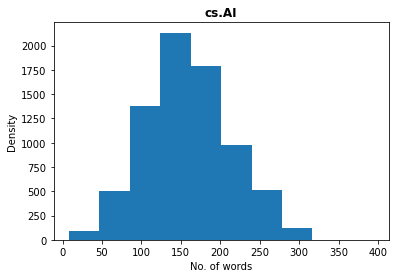

In [18]:
plt.hist(wrdsInSumAI)                    #Plotting Histogram using hist()
plt.xlabel('No. of words')               #Xlabel function is used to give name for x axis
plt.ylabel('Density')                    #Ylabel function is used to give name for y axis
  
plt.title('cs.AI',fontweight ="bold")    #Title function is used to give name/title for graph
plt.show()

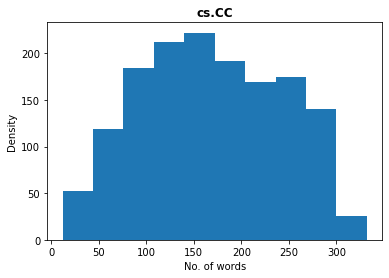

In [31]:
plt.hist(wrdsInSumCC)                    #Plotting Histogram using hist()
plt.xlabel('No. of words')               #Xlabel function is used to give name for x axis
plt.ylabel('Density')                    #Ylabel function is used to give name for y axis
  
plt.title('cs.CC',fontweight ="bold")    #Title function is used to give name/title for graph
plt.show()

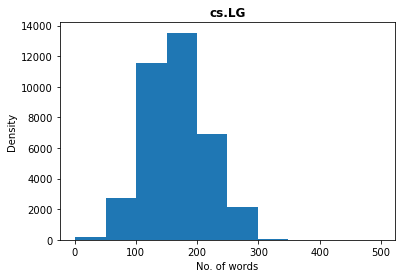

In [32]:
plt.hist(wrdsInSumLG)                    #Plotting Histogram using hist()
plt.xlabel('No. of words')               #Xlabel function is used to give name for x axis
plt.ylabel('Density')                    #Ylabel function is used to give name for y axis
  
plt.title('cs.LG',fontweight ="bold")    #Title function is used to give name/title for graph
plt.show()

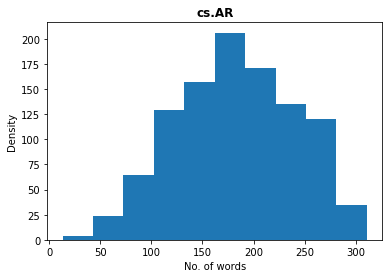

In [33]:
plt.hist(wrdsInSumAR)                    #Plotting Histogram using hist()
plt.xlabel('No. of words')               #Xlabel function is used to give name for x axis
plt.ylabel('Density')                    #Ylabel function is used to give name for y axis
  
plt.title('cs.AR',fontweight ="bold")    #Title function is used to give name/title for graph
plt.show()